## Importing Libraries

In [34]:
## libraries for reading and manipulating data
import pandas as pd
import numpy as np

## libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## libraries for splitting data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


## libraries for computing accuracy score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                            confusion_matrix, roc_auc_score, confusion_matrix)

from sklearn import metrics

## library for data scaling
from sklearn.preprocessing import StandardScaler

## library for imputing missing values
from sklearn.impute import SimpleImputer

## library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

## creating pipeplines
from sklearn.pipeline import Pipeline

## model building 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ( AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier, BaggingClassifier
)
from xgboost import XGBClassifier

## suppress warnings 
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [35]:
## loading dataset with pandas
train_generator_data = pd.read_csv("../dataset/Train.csv.csv")
test_generator_data = pd.read_csv("../dataset/Test.csv.csv")

In [36]:
## creating a copy of the data
train_df = train_generator_data.copy()
test_df = test_generator_data.copy()

## Data Overview

In [37]:
## lets preview our train data
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [38]:
## lets preview our test data
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


## Data Understanding

In [39]:
## lets the check the number of cols and rows for train data
print(f"Total Number Of Rows: {train_df.shape[0]} -> Total Number Of Cols: {test_df.shape[1]}")

Total Number Of Rows: 20000 -> Total Number Of Cols: 41


In [40]:
## lets the check the number of cols and rows for train data
print(f"Total Number Of Rows: {test_df.shape[0]} -> Total Number Of Cols: {test_df.shape[1]}")

Total Number Of Rows: 5000 -> Total Number Of Cols: 41


In [41]:
## findng a summary description of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [42]:
## findng a summary description of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [43]:
## computing the summary statistics on train data
train_df.describe().round()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.0,19982.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,-0.0,0.0,2.0,-0.0,-0.0,-1.0,-1.0,-1.0,-0.0,-0.0,...,0.0,0.0,-0.0,2.0,2.0,0.0,-0.0,1.0,-1.0,0.0
std,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,...,6.0,4.0,3.0,3.0,4.0,2.0,4.0,2.0,3.0,0.0
min,-12.0,-12.0,-11.0,-15.0,-9.0,-10.0,-8.0,-16.0,-9.0,-10.0,...,-20.0,-17.0,-18.0,-15.0,-15.0,-5.0,-17.0,-6.0,-11.0,0.0
25%,-3.0,-2.0,0.0,-2.0,-2.0,-2.0,-2.0,-3.0,-1.0,-1.0,...,-3.0,-2.0,-2.0,0.0,-1.0,-1.0,-3.0,-0.0,-3.0,0.0
50%,-1.0,0.0,2.0,-0.0,-0.0,-1.0,-1.0,-0.0,-0.0,0.0,...,0.0,-0.0,-0.0,2.0,2.0,-0.0,-0.0,1.0,-1.0,0.0
75%,2.0,3.0,5.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,...,4.0,2.0,1.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0
max,15.0,13.0,17.0,13.0,8.0,7.0,8.0,12.0,8.0,8.0,...,24.0,17.0,14.0,15.0,19.0,7.0,15.0,8.0,11.0,1.0


In [44]:
## computing the summary statistics on test data
test_df.describe().round()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.0,4994.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,-0.0,0.0,3.0,-0.0,-0.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,-0.0,-0.0,2.0,2.0,0.0,-0.0,1.0,-1.0,0.0
std,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,...,6.0,4.0,3.0,3.0,4.0,2.0,4.0,2.0,3.0,0.0
min,-12.0,-11.0,-9.0,-15.0,-8.0,-9.0,-8.0,-12.0,-7.0,-8.0,...,-17.0,-15.0,-15.0,-12.0,-13.0,-5.0,-15.0,-5.0,-10.0,0.0
25%,-3.0,-2.0,0.0,-2.0,-2.0,-2.0,-2.0,-3.0,-1.0,-1.0,...,-4.0,-2.0,-2.0,0.0,-1.0,-1.0,-3.0,-0.0,-3.0,0.0
50%,-1.0,0.0,2.0,-0.0,-0.0,-1.0,-1.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,2.0,2.0,-0.0,-0.0,1.0,-1.0,0.0
75%,2.0,2.0,5.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,...,4.0,2.0,1.0,4.0,4.0,1.0,2.0,2.0,1.0,0.0
max,14.0,14.0,15.0,12.0,8.0,5.0,8.0,10.0,9.0,7.0,...,27.0,13.0,12.0,13.0,17.0,7.0,13.0,7.0,9.0,1.0


In [45]:
## lets check the number of duplicates in the train data
train_df.duplicated().sum()

0

In [46]:
## lets check the number of duplicates in the test data
test_df.duplicated().sum()

0

In [47]:
## lets check for missing values in the train data
train_df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [48]:
## lets check for missing values in the test data
test_df.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

## Exploratory Data Analysis

### Train Data Target Variable Analysis

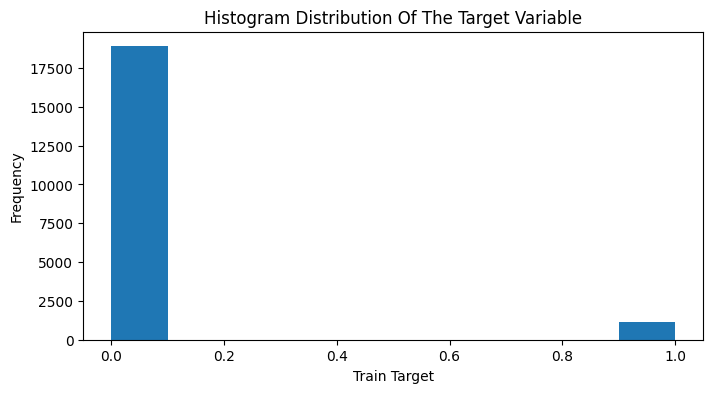

In [49]:
plt.figure(figsize=(8, 4))


plt.hist(train_df['Target'])
plt.title('Histogram Distribution Of The Target Variable')
plt.xlabel('Train Target')
plt.ylabel('Frequency')

plt.show()

In [50]:
## lets get the counts for each class of the target variable
train_df['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

### Test Data Target Variable Analysis

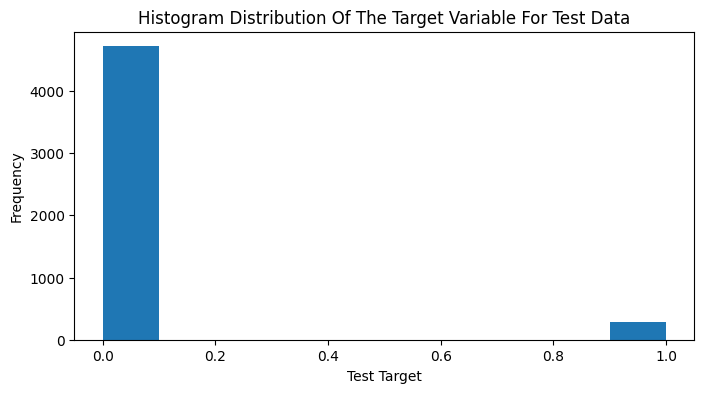

In [51]:
plt.figure(figsize=(8, 4))


plt.hist(test_df['Target'])
plt.title('Histogram Distribution Of The Target Variable For Test Data')
plt.xlabel('Test Target')
plt.ylabel('Frequency')

plt.show()

In [52]:
## lets get the counts for each class of the target variable
test_df['Target'].value_counts()

0    4718
1     282
Name: Target, dtype: int64

### Correlation

In [53]:
## selecting only numerical columns from the train data
numerical_train_data = train_df.select_dtypes(exclude=[object])

In [54]:
## compute pearson correlation
corr_matrix = numerical_train_data.corrwith(numerical_train_data['Target'])
corr_matrix

V1        0.073307
V2       -0.000946
V3       -0.213855
V4        0.110786
V5       -0.100525
V6        0.000237
V7        0.236907
V8        0.135996
V9        0.008124
V10      -0.051263
V11       0.196715
V12      -0.021807
V13      -0.139718
V14       0.117586
V15       0.249118
V16       0.230507
V17       0.085314
V18      -0.293340
V19       0.053897
V20       0.070803
V21       0.256411
V22      -0.134727
V23       0.071042
V24      -0.091242
V25      -0.001440
V26      -0.180469
V27       0.014891
V28       0.207359
V29       0.108342
V30       0.038867
V31      -0.136951
V32      -0.032793
V33      -0.102548
V34       0.153854
V35      -0.145603
V36      -0.216453
V37      -0.004769
V38       0.003584
V39      -0.227264
V40       0.007802
Target    1.000000
dtype: float64

In [55]:
## selecting only numerical columns from the train data
numerical_test_data = test_df.select_dtypes(exclude=[object])

In [56]:
## compute pearson correlation 
corr_matrix = numerical_test_data.corrwith(numerical_test_data['Target'])
corr_matrix


V1        0.065983
V2       -0.003076
V3       -0.218073
V4        0.111737
V5       -0.090702
V6        0.012480
V7        0.224378
V8        0.133286
V9       -0.005388
V10      -0.054234
V11       0.188537
V12      -0.028324
V13      -0.174878
V14       0.100623
V15       0.255764
V16       0.222012
V17       0.106458
V18      -0.271856
V19       0.053085
V20       0.073303
V21       0.260405
V22      -0.131882
V23       0.066794
V24      -0.068502
V25       0.001399
V26      -0.192716
V27       0.000121
V28       0.222712
V29       0.125078
V30       0.051768
V31      -0.134423
V32      -0.028957
V33      -0.090985
V34       0.145652
V35      -0.137913
V36      -0.218888
V37      -0.000708
V38       0.012683
V39      -0.243499
V40       0.024421
Target    1.000000
dtype: float64

### Plotting Histograms And Boxplots For All The Variables

In [57]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

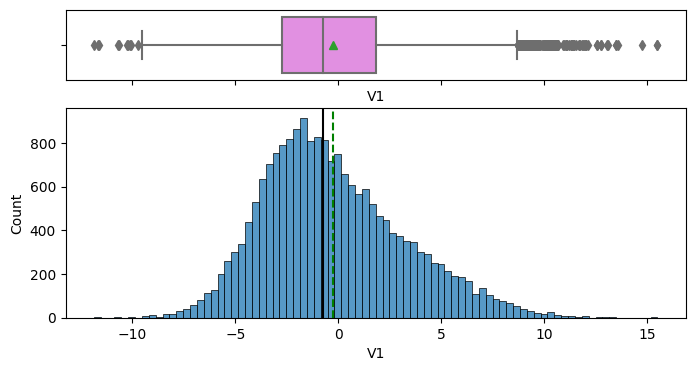

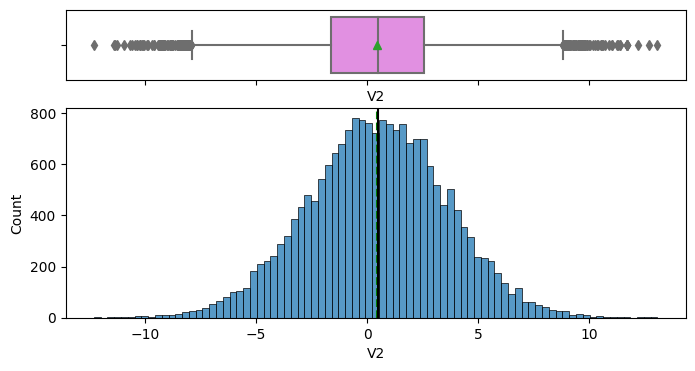

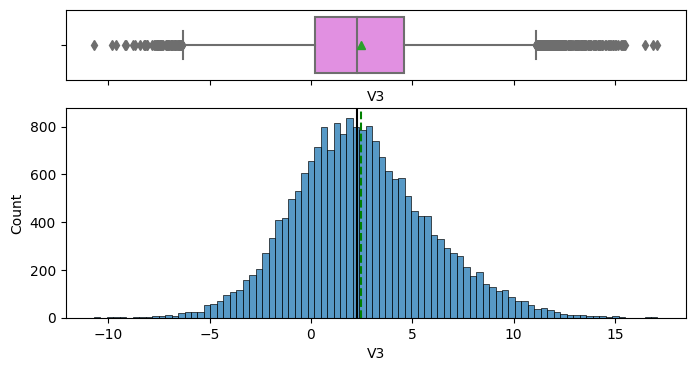

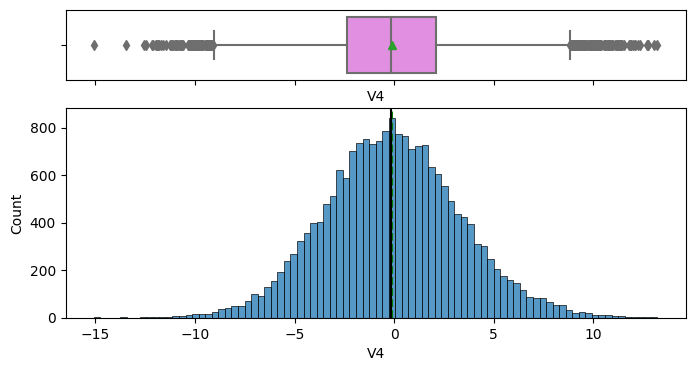

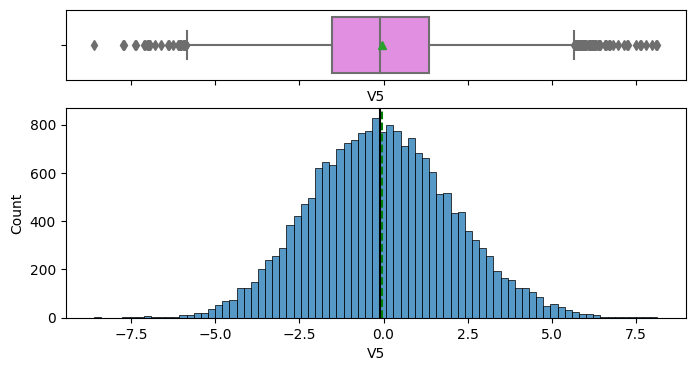

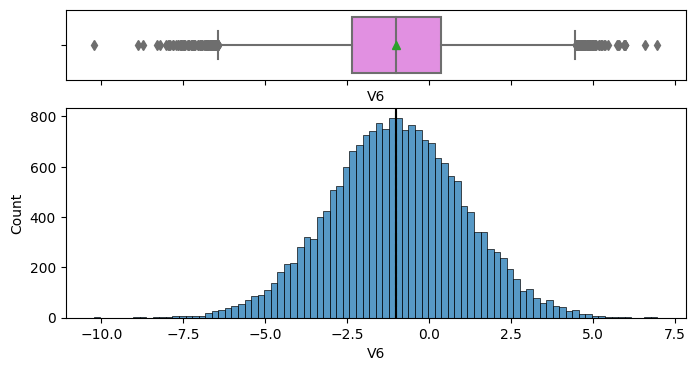

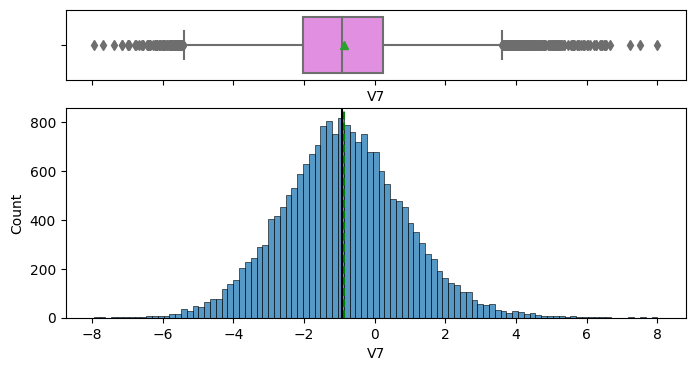

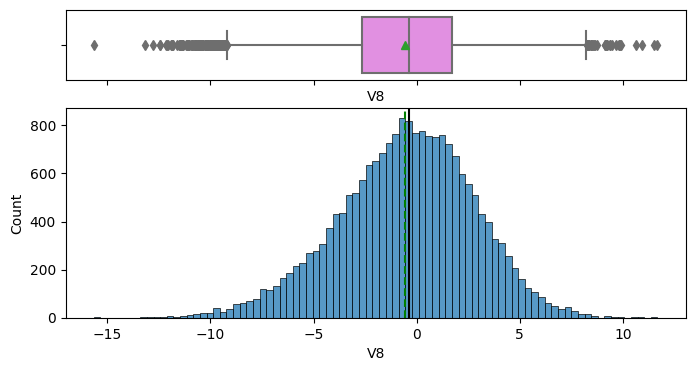

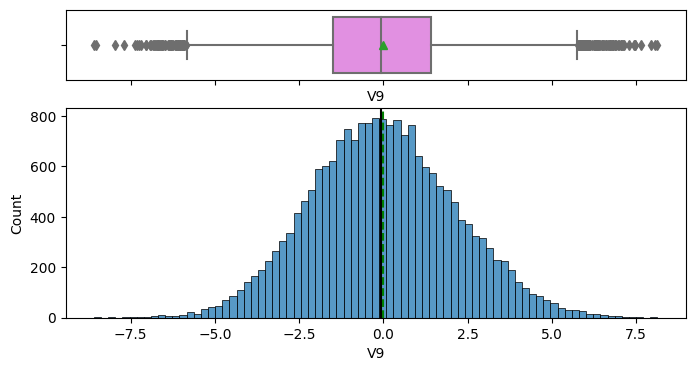

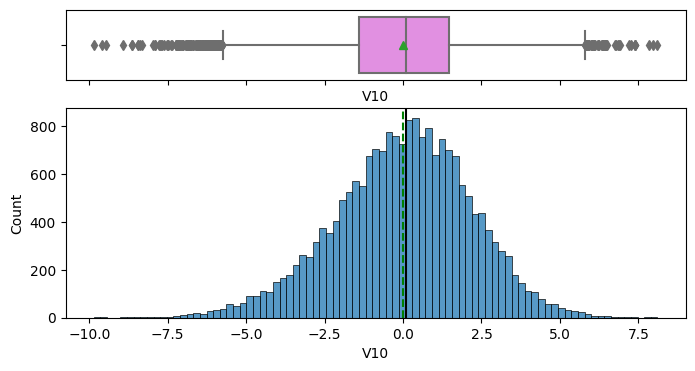

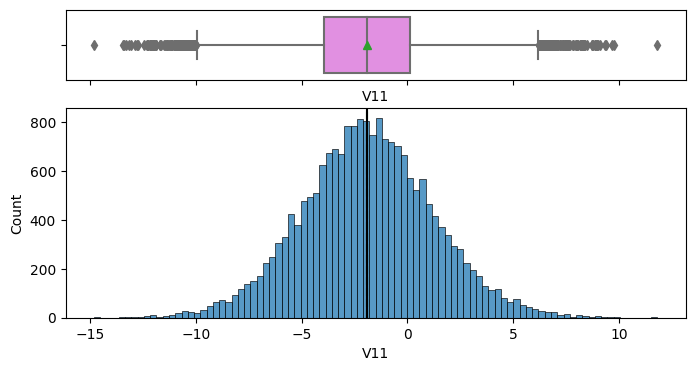

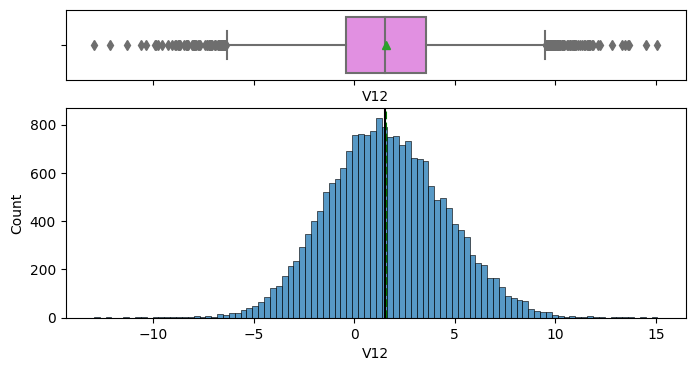

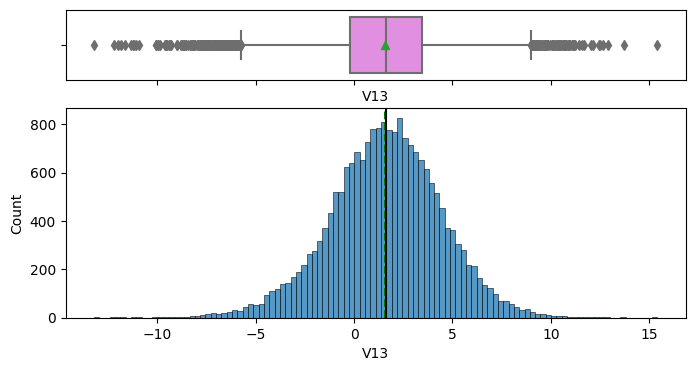

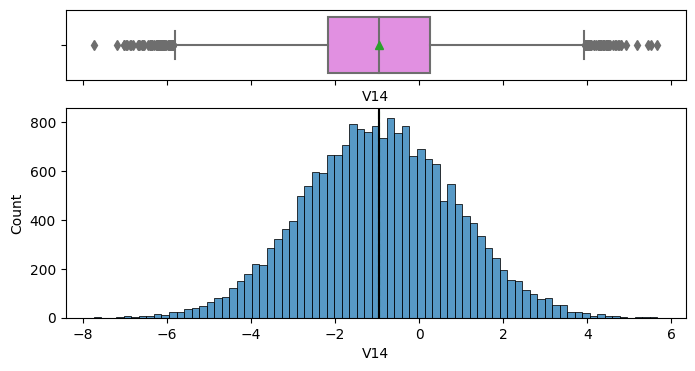

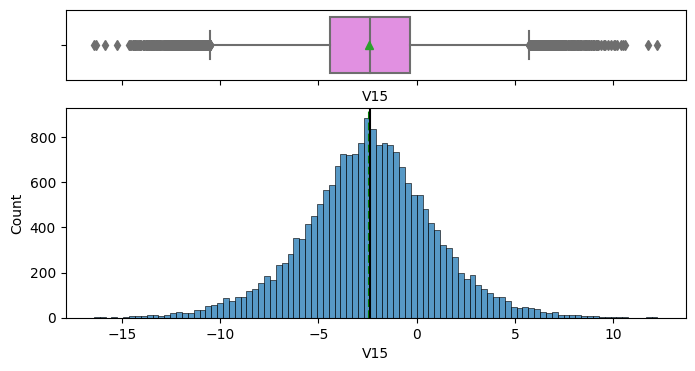

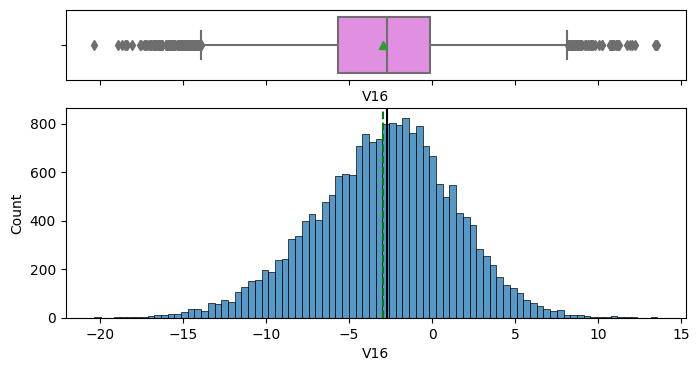

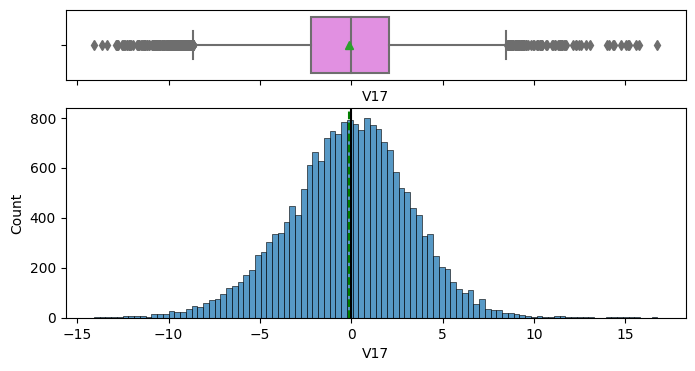

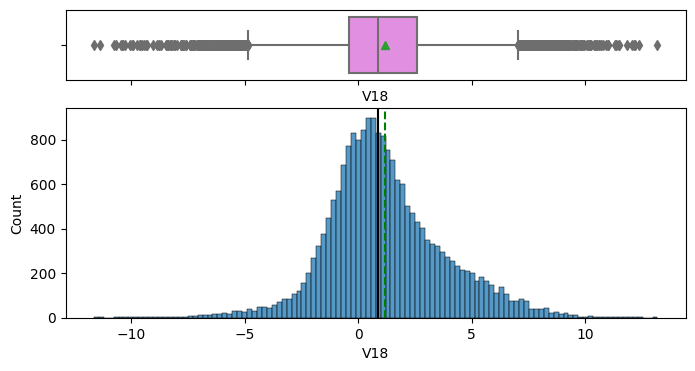

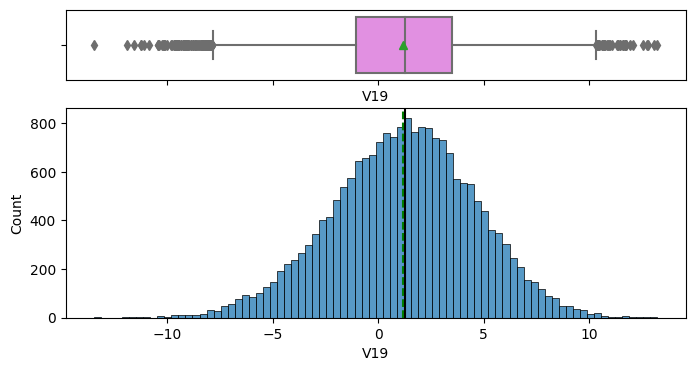

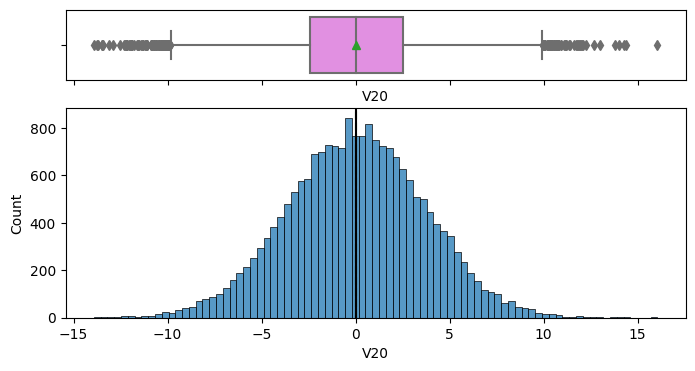

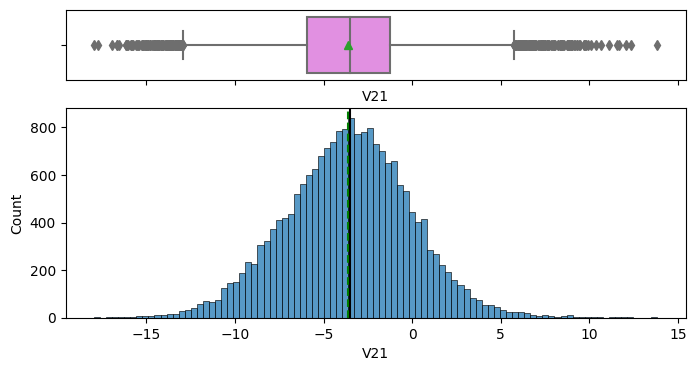

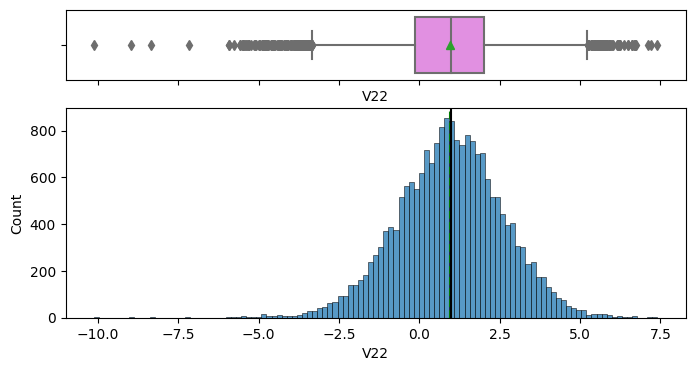

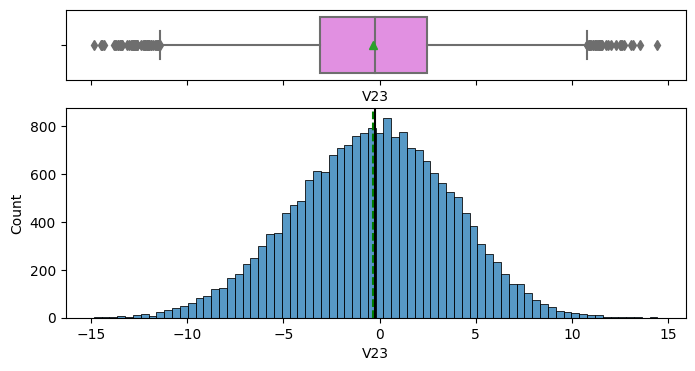

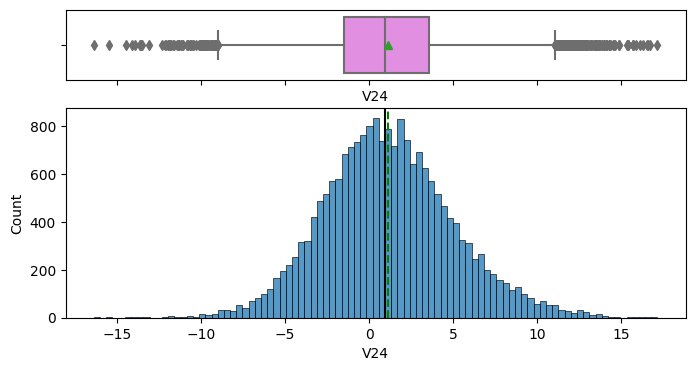

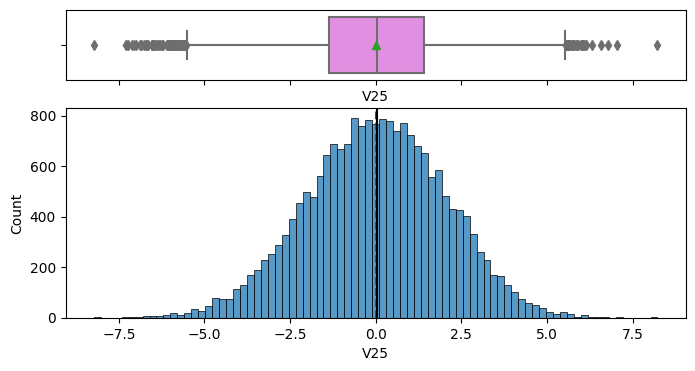

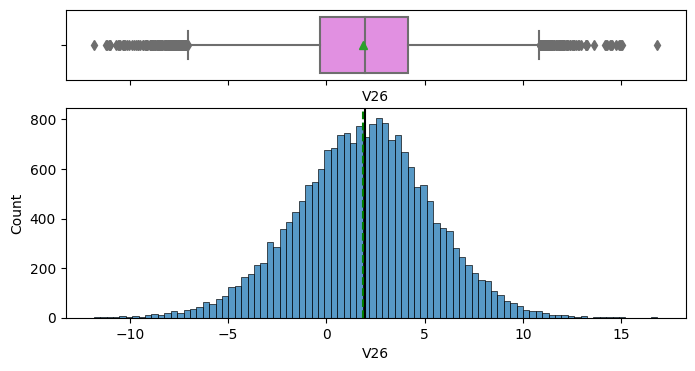

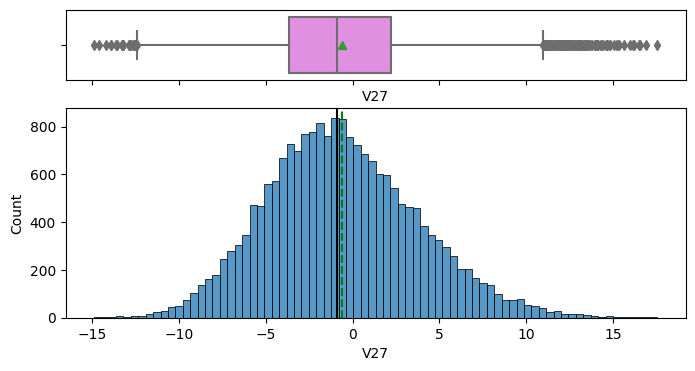

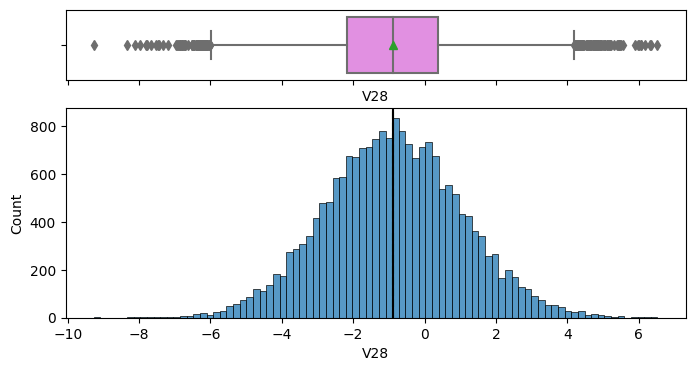

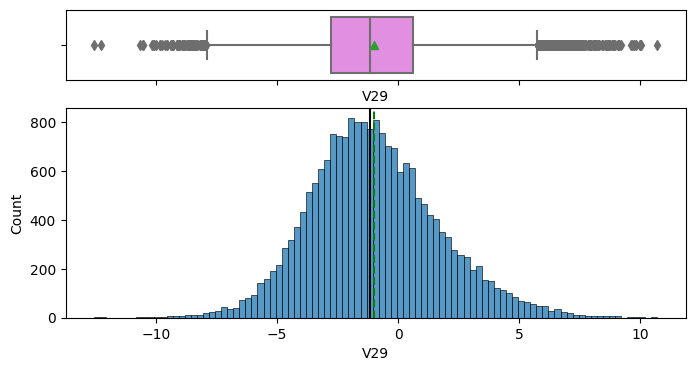

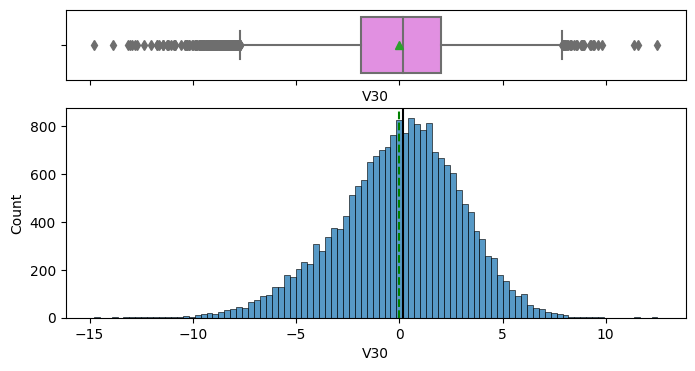

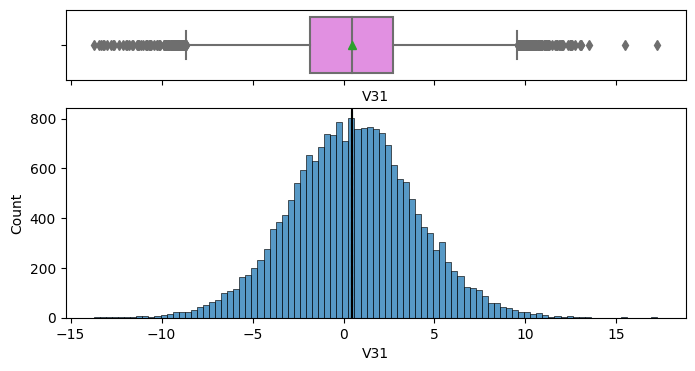

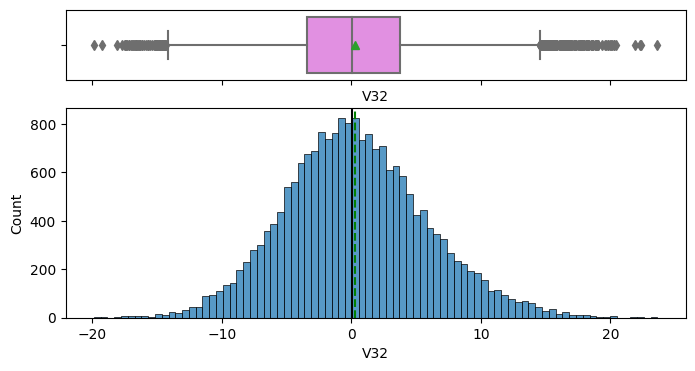

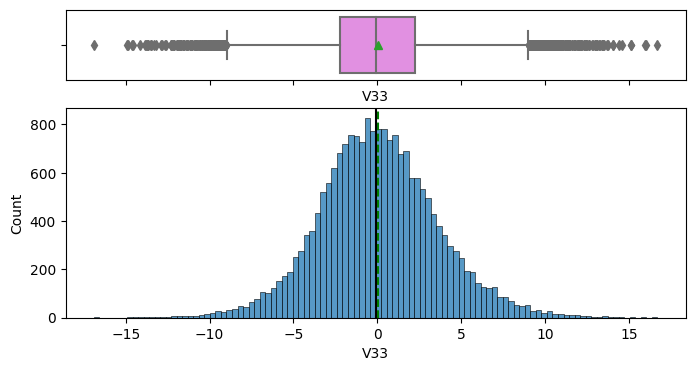

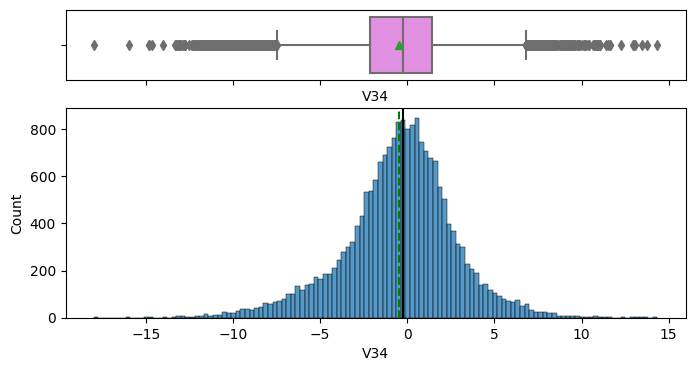

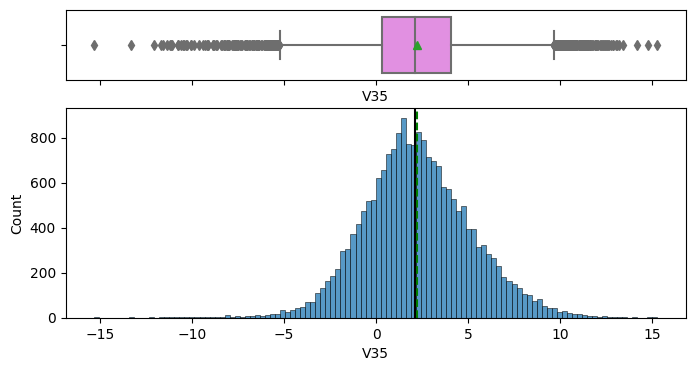

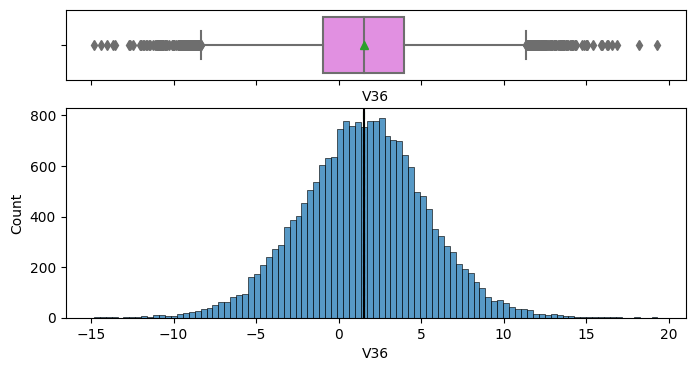

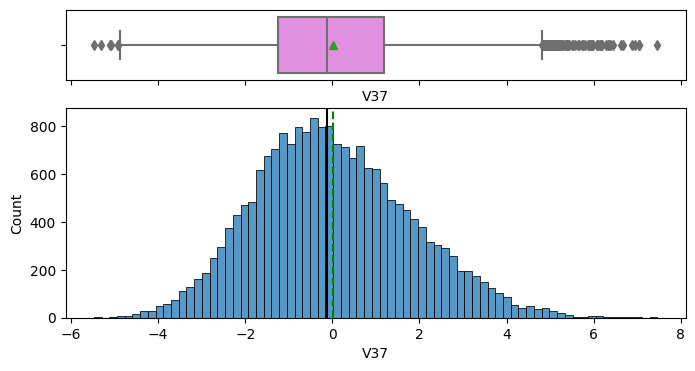

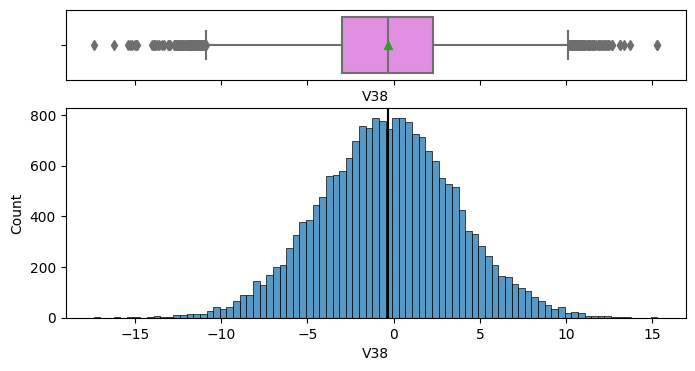

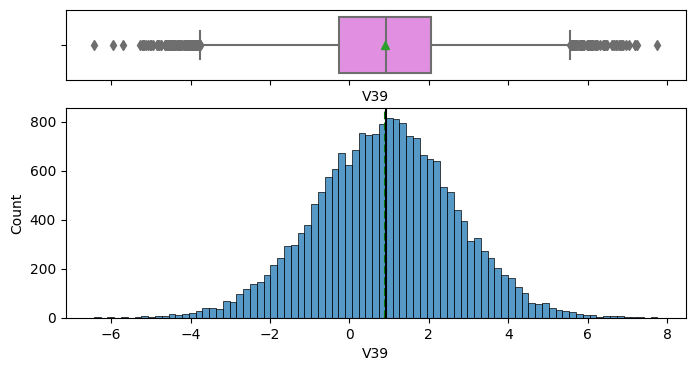

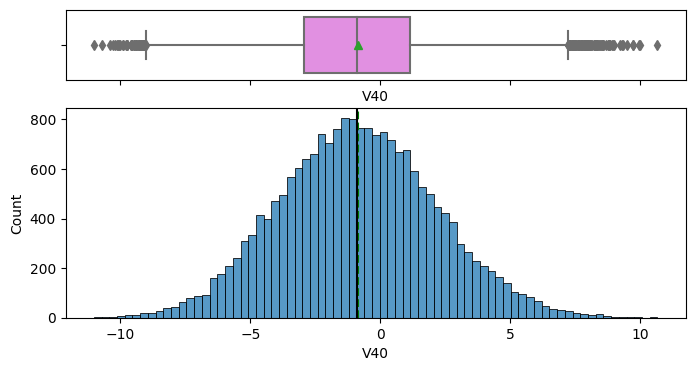

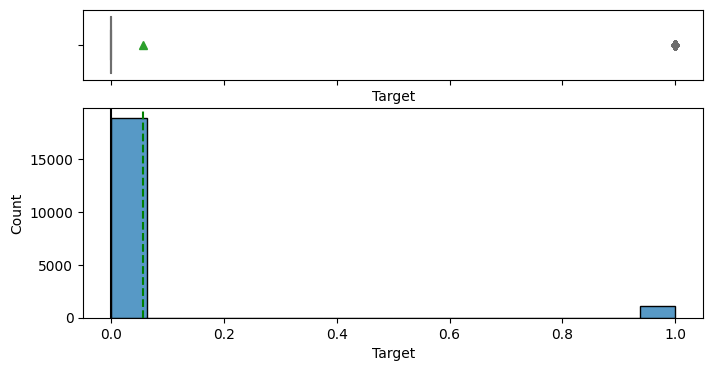

In [58]:
for feature in train_df.columns:
    histogram_boxplot(train_df, feature, figsize=(8,4), kde=False, bins=None)
    
    plt.show()

### Data PreProcessing 

In [ ]:
## create an instance of the imputer 
imputer = SimpleImputer(strategy="median")

## fit and transform the train dataframe
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)

## Building A Validation Framework / Splitting Dataset

In [60]:
## lets split the training data into train set and validation set
df_train, df_valid = train_test_split(train_df, test_size=0.2, random_state=11)

print(f"Training Size: {len(df_train)}")
print(f"Validation Size: {len(df_valid)}")

Training Size: 16000
Validation Size: 4000


In [61]:
## lets select the target variable 
y_train = df_train['Target'].values
y_valid = df_valid['Target'].values

In [62]:
## delete the target variable 
del df_train['Target']
del df_valid['Target']

In [70]:
## convert the dataframe to numpy array 
X_train = df_train.values
X_valid = df_valid.values

## Training Models 

In [64]:
## define a function to compute difference metrics score
## to check the performance of the classification model
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classifcation model performance
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    ## generate predictions using independent variables
    pred = model.predict(predictors)

    ## calculating the accuracy
    acc = accuracy_score(target, pred)
    ## calculating the Recall
    recall = recall_score(target, pred)
    ## calculating the Precision
    precision = precision_score(target, pred)
    ## calculating the F1-Score
    f1 = f1_score(target, pred)

    ## creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        }, 
        index[0],
    )

In [65]:
def confusion_matrix(model, predictors, target):
    """
    function to plot the confusion matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variables  
    """
    y_valid_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred_valid)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6,4))
    plt.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    

In [68]:
## type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [71]:
## lets create a list of all the classification ML models to use for training

## empty list to store all the models
models = []

## append models to the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting Classifier", GradientBoostingClassifier(random_state=1)))
models.append(("Random Forest Classifier", RandomForestClassifier(random_state=1)))
models.append(("XGB Classifier", XGBClassifier(random_state=1)))

## empty list to store all models scores
results = []

## empty list to store names of models
names = []

## lets loop through all the models and get the mean cross validation score
print("\n" "Cross-Validation Score On Training Data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)

    results.append(cv_result)
    names.append(name)

    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    y_valid_pred = model.predict(X_valid)
    scores = recall_score(y_valid, y_valid_pred)
    print("{}: {}".format(name, scores))


Cross-Validation Score On Training Data:

Logistic Regression: 0.47262569832402235
Bagging Classifier: 0.7027932960893855
Decision Tree Classifier: 0.7195530726256983
AdaBoost Classifier: 0.5910614525139666
Gradient Boosting Classifier: 0.7150837988826815
Random Forest Classifier: 0.7284916201117319
XGB Classifier: 0.8089385474860336

Validation Performance:

Logistic Regression: 0.5534883720930233
Bagging Classifier: 0.7395348837209302
Decision Tree Classifier: 0.7302325581395349
AdaBoost Classifier: 0.6232558139534884
Gradient Boosting Classifier: 0.7674418604651163
Random Forest Classifier: 0.7674418604651163
XGB Classifier: 0.8093023255813954
